In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

# Reading the Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Cleaning the Data

I will take the following steps to clean the data
- Correcting data types
- Remove any unnecessary columns or values
- Handle missing values
- Remove outliers
- Remove multicollinearity

### Correcting data types

Renaming column names for ease of analysis

In [5]:
rename_columns = ['age','sex','chest_pain_type','blood_pressure','cholesterol','blood_sugar','resting_ECG','max_heart_rate','exercise_induced_angina','old_peak','st_slope','heart_disease']

df.columns = rename_columns
df.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      918 non-null    int64  
 1   sex                      918 non-null    object 
 2   chest_pain_type          918 non-null    object 
 3   blood_pressure           918 non-null    int64  
 4   cholesterol              918 non-null    int64  
 5   blood_sugar              918 non-null    int64  
 6   resting_ECG              918 non-null    object 
 7   max_heart_rate           918 non-null    int64  
 8   exercise_induced_angina  918 non-null    object 
 9   old_peak                 918 non-null    float64
 10  st_slope                 918 non-null    object 
 11  heart_disease            918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
categorical_features = ['sex','chest_pain_type','blood_sugar','resting_ECG','exercise_induced_angina','st_slope']

df[categorical_features] = df[categorical_features].astype(object)

### Remove unnecessary columns or values

All the columns appear to be important and are useful so no columns will be removed

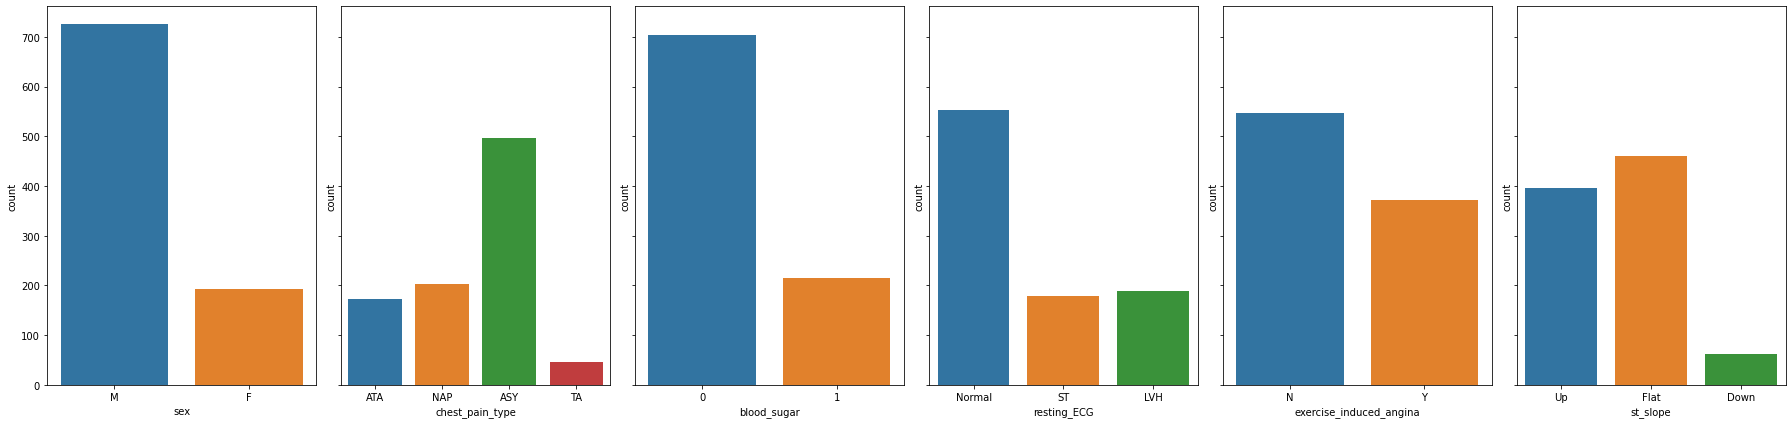

In [21]:
fig, axes = plt.subplots(1,6,figsize=(25,6),sharey=True)
for ax, col in enumerate(df[categorical_features]):
    sns.countplot(x=col,data=df,ax=axes[ax])

plt.tight_layout()

In [22]:
df['sex'].replace({'M':'male','F':'female'}, inplace=True)

df['chest_pain_type'].replace({'ATA':'atypical angina','TA':'typical angina','NAP':'non-anginal pain','ASY':'asymptomatic'},inplace=True)

df['blood_sugar'].replace({'0':'less than 120mg/dl','1':'more than 120mg/dl'},inplace=True)

df['exercise_induced_angina'].replace({'N':'no','Y':'yes'},inplace=True)

### Handle missing values

<AxesSubplot:>

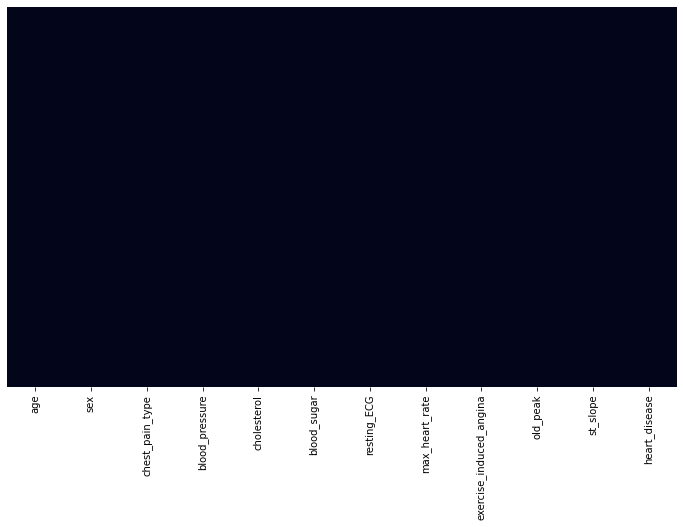

In [25]:
fig = plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Luckily there are no missing values so no other steps required

### Remove outliers

In [ ]:
numerical_features = ['age','blood_pressure','']